In [1]:
import numpy
import pandas as pd
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils


**Loading MNIST dataset for digit**

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train

11501568/11490434 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

**Loading a-z alphabet dataset for predicting alphabets**

In [3]:
#charDF = pd.read_csv("alphabet_data.csv").astype('float32')
charDF = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')
charDF.rename(columns={'0':'label'}, inplace=True)
charDF


label  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449   25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
...       ...    ...    ...    ...    ...    ...    ...    ...  
372445    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372446    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372447    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372448    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
372449    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[372450 rows x 785 columns]

In [4]:
# split data to features and target
X = charDF.drop('label',axis = 1)
y = charDF['label']
y = y+10 #so that digit and alphabet do not overlap


In [5]:
X = X.values.reshape(X.shape[0], 28, 28)

**Splitting into train and test dataset**

In [6]:
from sklearn.model_selection import train_test_split
(trainX,testX,trainY,testY) = train_test_split(X,y.astype("int"),test_size=0.2,random_state=42)

**Appending digits and alphabet datasets**

In [7]:
import numpy as np
X_train = np.append(X_train, trainX, axis=0)
X_test = np.append(X_test, testX, axis=0)
y_train = np.append(y_train, trainY, axis=0)
y_test = np.append(y_test, testY, axis=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(357960, 28, 28)
(84490, 28, 28)
(357960,)
(84490,)


Showing image in 28*28 pixel

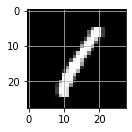

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

# Model for prediction of data

In [9]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import optimizers

In [10]:
# Reshaping to CNN format
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
#print(X_train)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

# normalize inputs to values between 0 and 1
X_train /= 255
X_test /= 255

# encoding for alphabet and digits
num_of_class = 36
y_train = np_utils.to_categorical(y_train, num_of_class)
y_test = np_utils.to_categorical(y_test, num_of_class)

In [11]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# regularization layer to reduce overfitting
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# output layer with number of classes
model.add(Dense(num_of_class, activation='softmax'))



2022-05-10 23:12:59.557876: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Compiling our model**

In [12]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training our model**

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=200)

2022-05-10 23:13:01.918019: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8
1790/1790 [==============================] - 65s 36ms/step - loss: 0.3118 - accuracy: 0.9121 - val_loss: 0.1215 - val_accuracy: 0.9678
Epoch 2/8
1790/1790 [==============================] - 63s 35ms/step - loss: 0.1267 - accuracy: 0.9632 - val_loss: 0.0842 - val_accuracy: 0.9761
Epoch 3/8
1790/1790 [==============================] - 63s 35ms/step - loss: 0.1011 - accuracy: 0.9704 - val_loss: 0.0754 - val_accuracy: 0.9786
Epoch 4/8
1790/1790 [==============================] - 62s 35ms/step - loss: 0.0869 - accuracy: 0.9743 - val_loss: 0.0721 - val_accuracy: 0.9802
Epoch 5/8
1790/1790 [==============================] - 63s 35ms/step - loss: 0.0767 - accuracy: 0.9769 - val_loss: 0.0668 - val_accuracy: 0.9813
Epoch 6/8
1790/1790 [==============================] - 63s 35ms/step - loss: 0.0697 - accuracy: 0.9789 - val_loss: 0.0609 - val_accuracy: 0.9834
Epoch 7/8
1790/1790 [==============================] - 62s 35ms/step - loss: 0.0638 - accuracy: 0.9804 - val_loss: 0.0581 - val_ac

In [14]:
metrics = model.evaluate(X_test, y_test, verbose=0)

**Checking accuracy of model**

In [15]:
print("loss:", metrics[0])


loss: 0.05402668938040733


In [16]:
print("Accuracy:", metrics[1])

Accuracy: 0.9852172136306763


# Saving model so that it can be used further

In [17]:
model.save('hs_model.h5')